In [1]:
# from google.colab import files
# files.upload()  # Upload kaggle.json

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle competitions download -c playground-series-s5e8

Saving kaggle.json to kaggle.json
  0% 0.00/14.7M [00:00<?, ?B/s]
100% 14.7M/14.7M [00:00<00:00, 977MB/s]


In [5]:
# !unzip /content/playground-series-s5e8.zip -d /content/playground-series-s5e8

Archive:  /content/playground-series-s5e8.zip
  inflating: /content/playground-series-s5e8/sample_submission.csv  
  inflating: /content/playground-series-s5e8/test.csv  
  inflating: /content/playground-series-s5e8/train.csv  


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
test_df = pd.read_csv('/content/playground-series-s5e8/test.csv')
test_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [8]:
sub_df = pd.read_csv('/content/playground-series-s5e8/sample_submission.csv')
sub_df.head()

,id,y
0,750000,0.5
1,750001,0.5
2,750002,0.5
3,750003,0.5
4,750004,0.5


In [9]:
df = pd.read_csv('/content/playground-series-s5e8/train.csv')
df.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
5,5,24,admin.,single,secondary,no,1882,yes,no,cellular,20,apr,1010,3,-1,0,unknown,0
6,6,39,blue-collar,married,secondary,no,0,no,no,telephone,21,nov,90,1,-1,0,unknown,0
7,7,50,admin.,single,secondary,no,1595,no,no,telephone,31,jul,49,25,-1,0,unknown,0
8,8,46,blue-collar,married,primary,no,1463,no,no,cellular,4,aug,50,1,-1,0,unknown,0
9,9,39,management,divorced,tertiary,no,25,yes,no,cellular,8,may,119,1,-1,0,unknown,0


In [10]:
df.shape

(750000, 18)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [14]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [15]:
for col in df.select_dtypes('object').columns:
  print(f'{col}: {df[col].unique()}')

job: ['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed']
marital: ['married' 'single' 'divorced']
education: ['secondary' 'primary' 'tertiary' 'unknown']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'unknown' 'telephone']
month: ['aug' 'jun' 'may' 'feb' 'apr' 'nov' 'jul' 'jan' 'oct' 'mar' 'sep' 'dec']
poutcome: ['unknown' 'other' 'failure' 'success']


In [16]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [18]:
df1 = df.drop(['id'], axis=1)

In [19]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


## ML pipeline notes to apply to test

1. was_previously_contacted = (pdays != -1)
2.

In [21]:
df1['was_previously_contacted'] = df1['pdays'].apply(lambda x:1 if x != -1 else 0).astype("int8")

In [26]:
all_cols = set(df1.columns)-set('y')
all_cols.__len__()

17

In [37]:
def plot_feature_vs_target(df, feature_col, target_col='y'):
    plt.figure(figsize=(15, 6))

    if pd.api.types.is_numeric_dtype(df[feature_col]):
        sns.histplot(data=df, x=feature_col, hue=target_col, kde=True)
    else:
        sns.countplot(data=df, x=feature_col, hue=target_col)
        plt.xticks(rotation=45)

    plt.title(f"{feature_col} vs {target_col}")
    plt.tight_layout()
    plt.show()

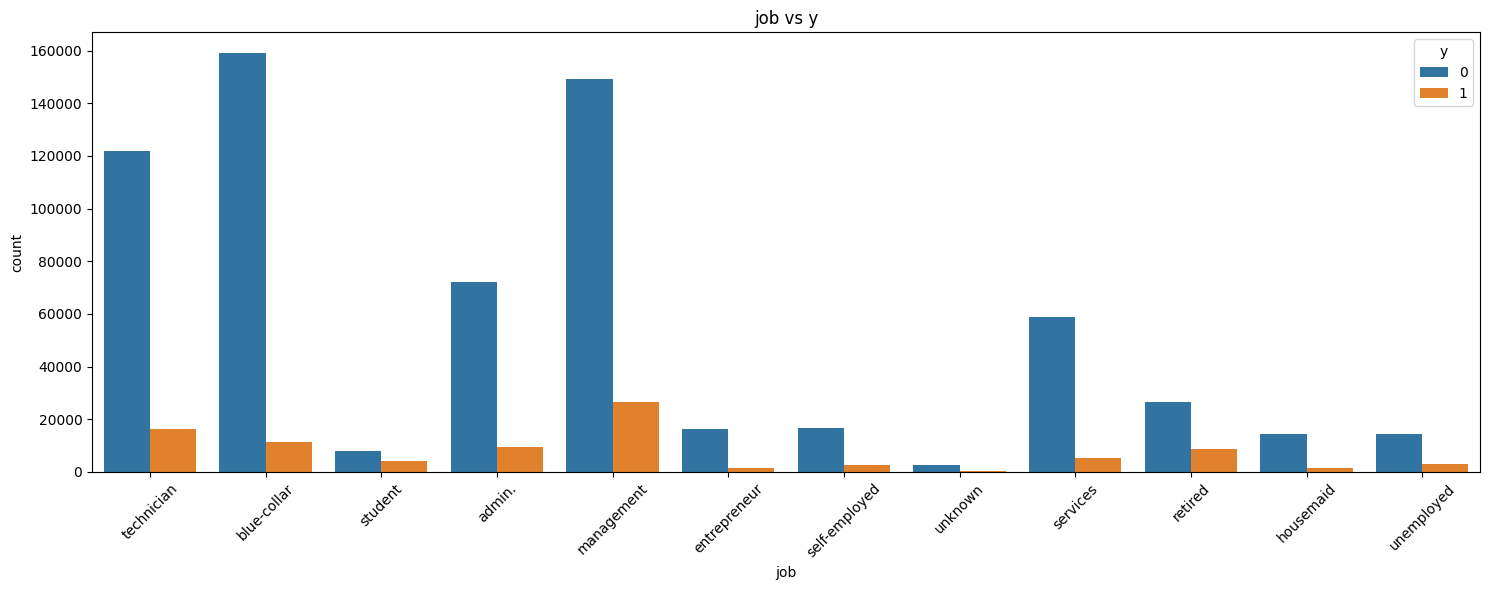

In [38]:
plot_feature_vs_target(df, 'job')

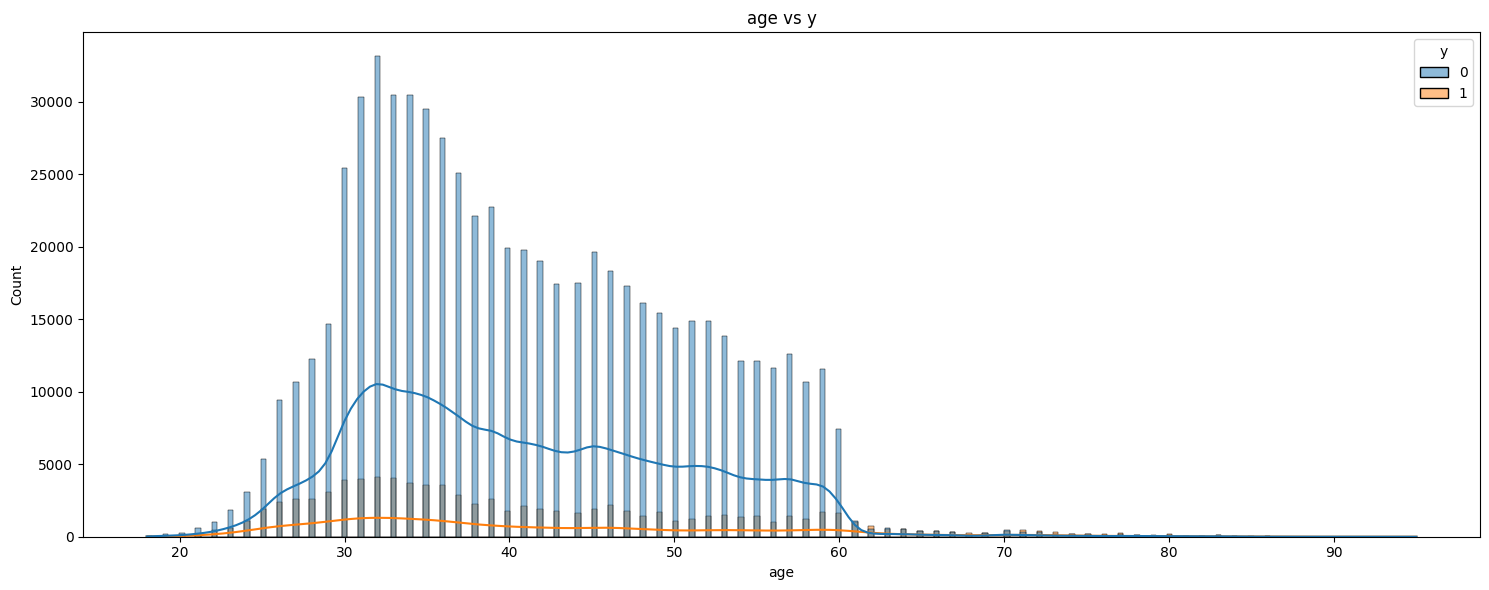

In [39]:
plot_feature_vs_target(df, 'age')

In [43]:
all_cols

{'age',
 'balance',
 'campaign',
 'contact',
 'day',
 'default',
 'duration',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'pdays',
 'poutcome',
 'previous',
 'was_previously_contacted'}

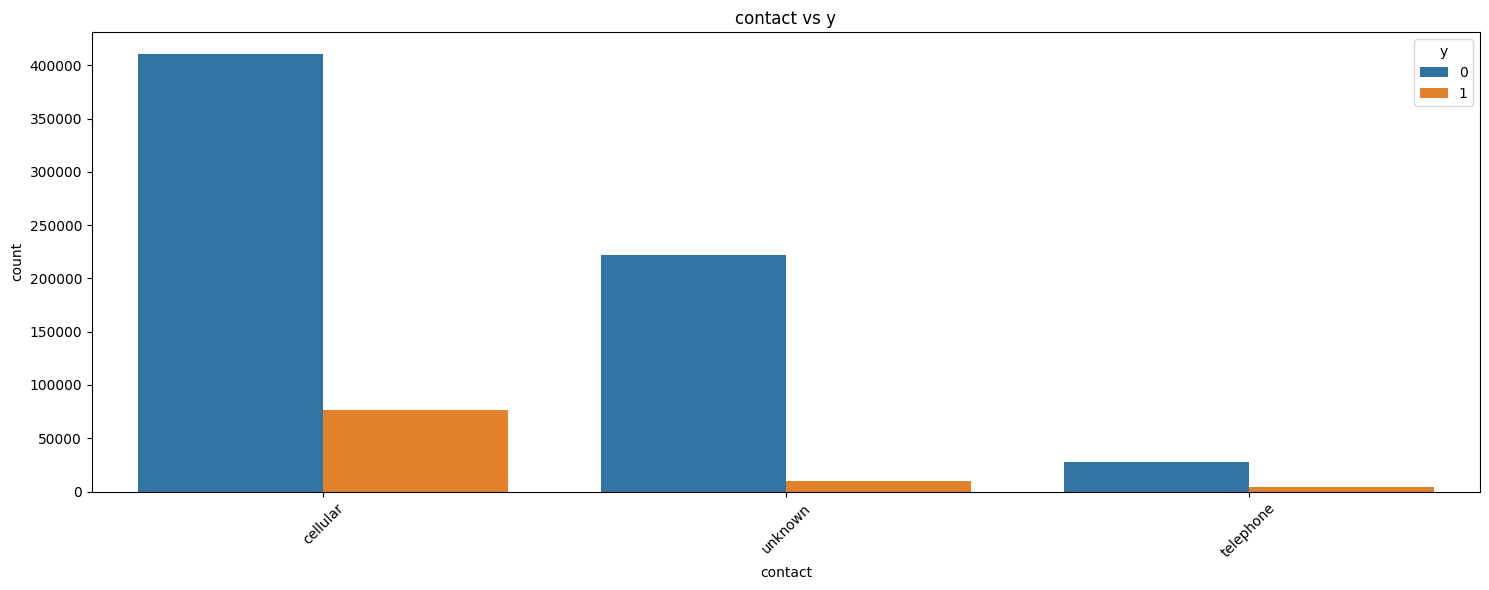

In [60]:
plot_feature_vs_target(df1, 'contact')

## At end download the orignal dataset and then test the model on that